<a href="https://colab.research.google.com/github/Zhiyuan-03/AI_in_Transportation_Exercise/blob/main/xGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bus arrival delays

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [2]:
df.shape

(2179, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


In [4]:
df = df.iloc[:1000]

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

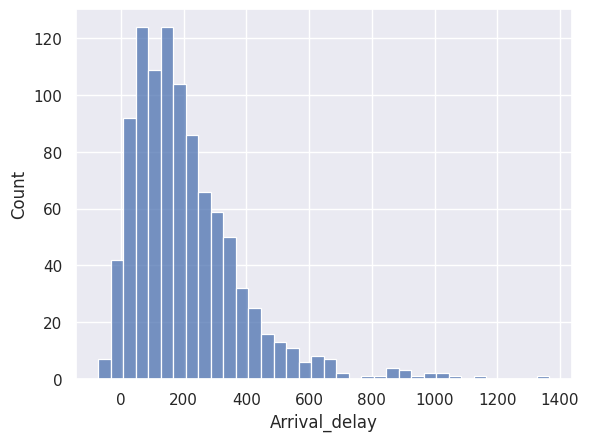

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [7]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993908
Dwell_time,0.222777
Recurrent_delay,0.161830
Scheduled_travel_time,0.117362


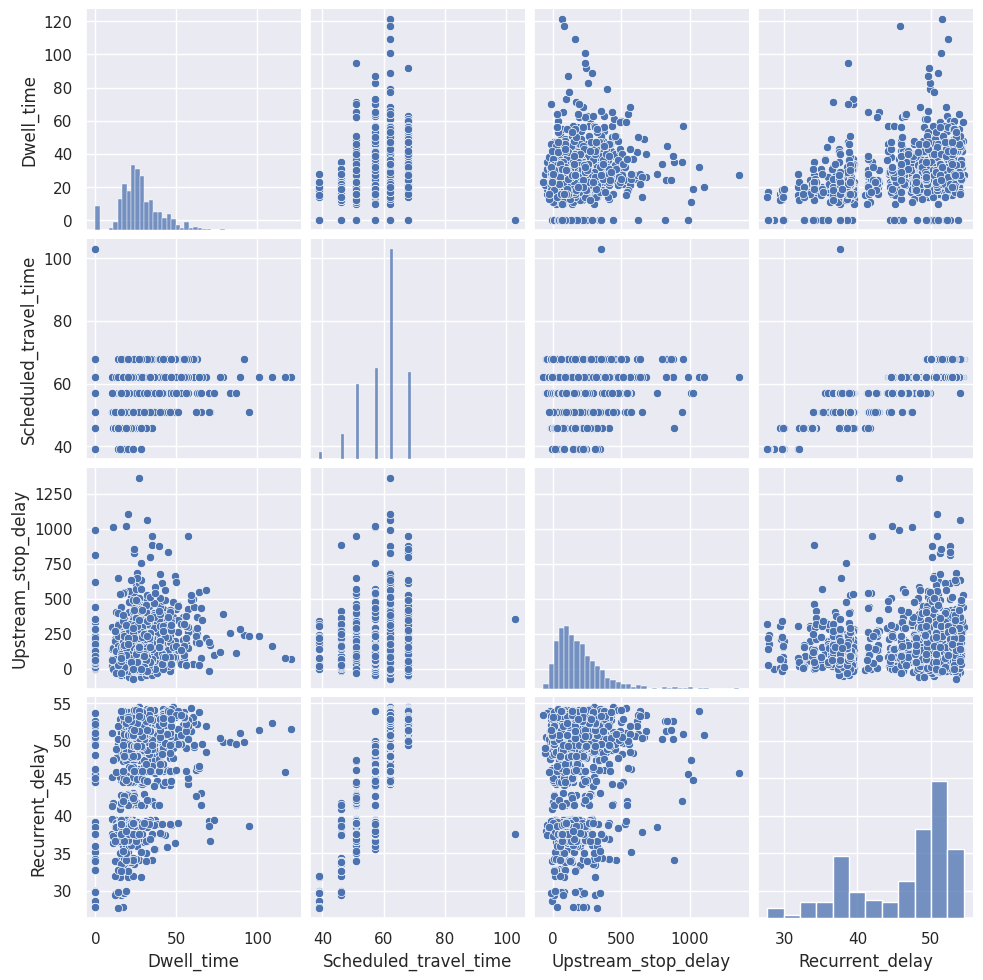

In [8]:
x = df.drop(['Arrival_delay'], axis=1)  #drop the y; think about mse etc
y = df['Arrival_delay']

sns.pairplot(x)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #why set randomstate= 42

Linear Regression

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    "booster": "gblinear",         # Use linear base learner
    "objective": "reg:squarederror"  # Regression objective
}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
preds = xgb_model.predict(dtest)
y_pred = xgb_model.predict(dtest)


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Absolute Error: 13.448460578918457
Mean Squared Error: 314.548583984375
R-squared: 0.9873495697975159
Root Mean Squared Error: 17.7355


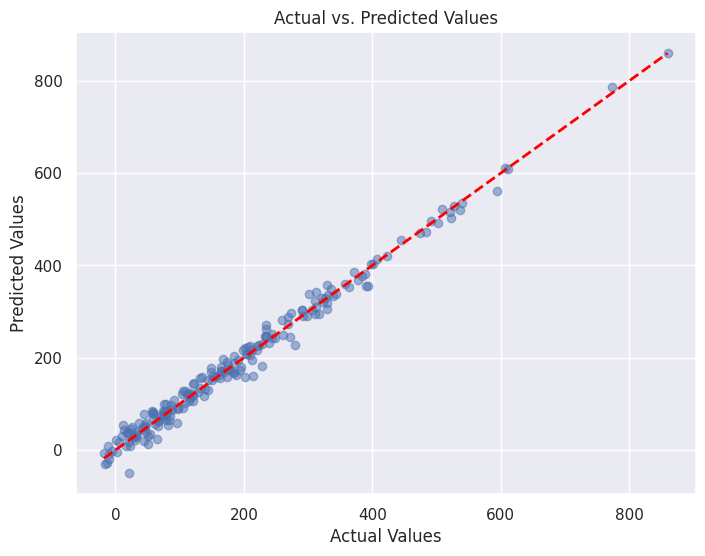

In [13]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Grid Search--Decision tree

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    "n_estimators": [25, 28],
    "max_depth": [4],
    "subsample": [1.0],
    "colsample_bytree": [0.6, 0.9, 1.0],
    "min_child_weight":[1,2],
    "reg_alpha":[1.0],
    "reg_lambda":[1.0]

}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1            # Use all available cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'colsample_bytree': 1.0, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 28, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 1.0}
Best score: 0.988087821006775


In [15]:
from xgboost import XGBRegressor

# Use the best parameters from grid search
best_params = grid_search.best_params_

final_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# Train the model
final_model.fit(X_train, y_train)

# Predict on test data
y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


R² Score: 0.9917
Mean Squared Error: 206.7993
Mean Absolute Error: 10.7828
Root Mean Squared Error: 14.3805


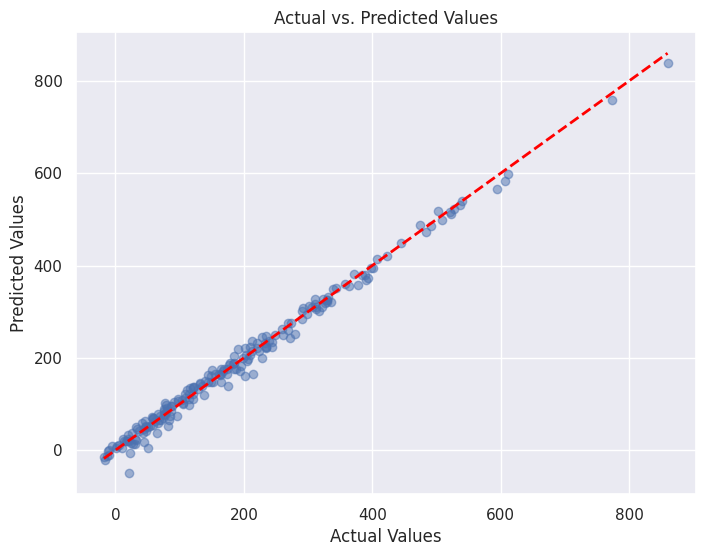

In [16]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Comparison Analysis:
When using xgboost package, decision tree method appears to have a better fit compared with linear regression using default parameters, with higher r2(0.99) and lower rmse(14.38),mse(206.79) and mae(10.78). The combination of the best parameters I found is colsample_bytree: 1.0, max_depth: 4, min_child_weight: 1, n_estimators: 28, reg_alpha: 1.0, reg_lambda: 1.0, subsample: 1.0.


Bike Sharing Demands

In [17]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

In [18]:
df.shape

(17379, 17)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean Absolute Error: 105.03277833223069
Mean Squared Error: 19463.820321623814
R-squared: 0.38532867567032325
Root Mean Squared Error: 139.5128


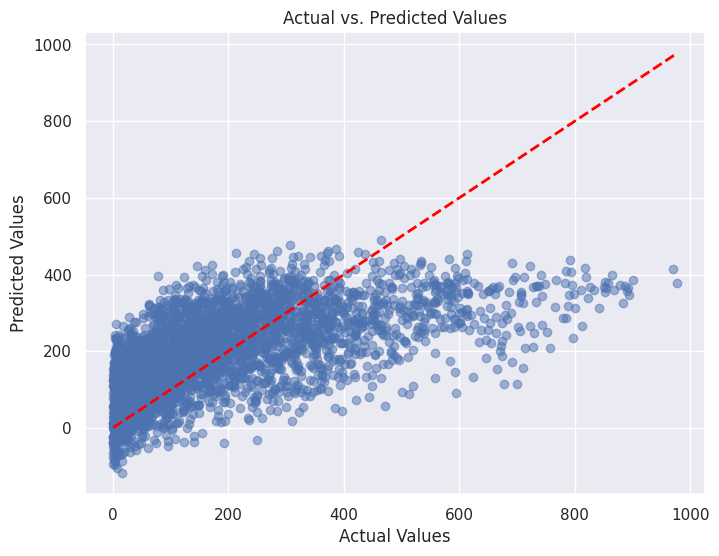

In [24]:
#xgboost
import xgboost as xgb
import numpy as np
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    "booster": "gblinear",         # Use linear base learner
    "objective": "reg:squarederror"  # Regression objective
}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
preds = xgb_model.predict(dtest)
y_pred = xgb_model.predict(dtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse:.4f}")
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    "n_estimators": [271],
    "max_depth": [6],
    "subsample": [1.0],
    "colsample_bytree": [1.0],
    "min_child_weight":[7],
    "reg_alpha":[1],
    "reg_lambda":[10]

}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1            # Use all available cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 271, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 1.0}
Best score: 0.9448442907254423


In [26]:
from xgboost import XGBRegressor
import numpy as np
# Use the best parameters from grid search
best_params = grid_search.best_params_

final_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# Train the model
final_model.fit(X_train, y_train)
# Predict on test data
y_pred = final_model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R² Score: 0.9490
Mean Squared Error: 1616.1975
Mean Absolute Error: 25.5848
Root Mean Squared Error: 40.2020


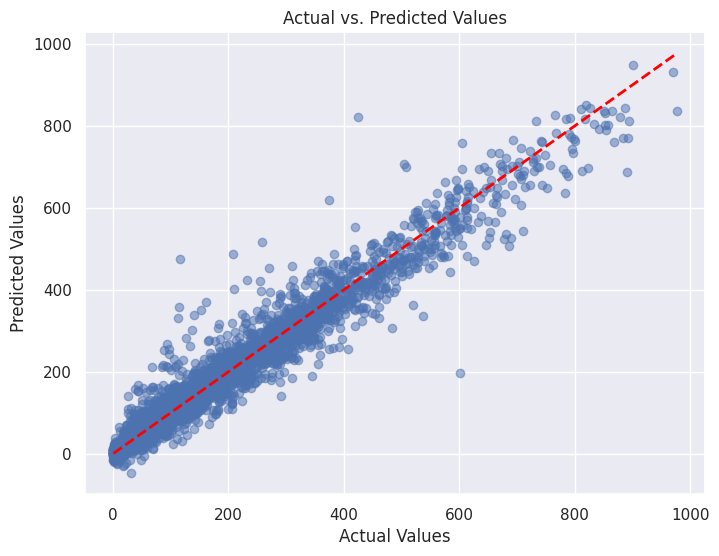

In [27]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

Comparison Analysis:
When using xgboost package, decision tree method appears to have a better fit compared with linear regression using default parameters, with higher r2(0.94) and lower rmse(40.2), mse(1616.20) and mae(25.58). The combination of the best parameters I found is colsample_bytree: 1.0, max_depth: 6, min_child_weight: 7, n_estimators: 271, reg_alpha: 1.0, reg_lambda: 10, subsample: 1.0.